Text(0.5, 0, 'phase')

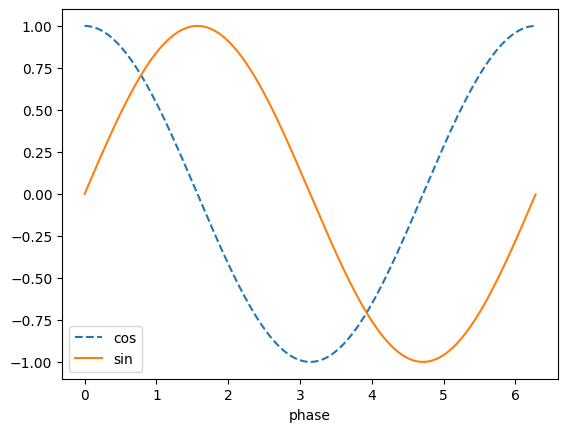

In [5]:
import matplotlib.pyplot as plt
import numpy as np

phases = np.arange(0, np.pi*2, 0.01)
cos_sig = np.cos(phases)
sin_sig = np.sin(phases)

plt.plot(phases, cos_sig, linestyle="dashed")
plt.plot(phases, sin_sig)
plt.legend(["cos", "sin"])
plt.xlabel("phase")

# Synthesis using linear algebra techniques


$M = cos(2\pi t\otimes  f)\\$
$y = Ma$

where

a = vector of amplitudes for the 'partials'

f = vector of frequencies for the partials

$\otimes$ means outer product

M will be size of t x size of f

adapted from thinkdsp p66

args (11025, 3)
M of cos (11025, 3)
final ys (11025,)


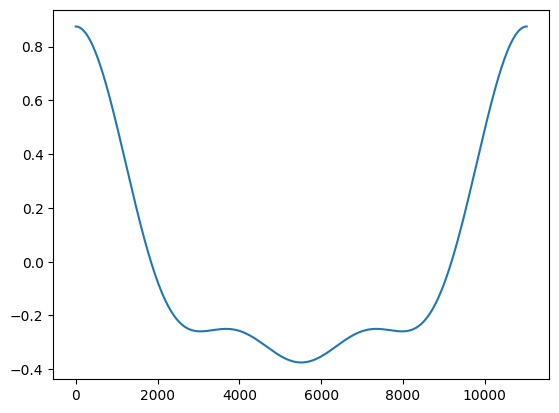

In [7]:
# adapted from thinkdsp p65
def synthesize2(amps, fs, ts):
    args = np.outer(ts, fs) # 
    print("args", args.shape)
    M = np.cos(np.pi*2 * args) 
    print("M of cos", M.shape)
    ys = np.dot(M, amps)
    print("final ys", ys.shape)
    return ys

framerate = 11025
ts = np.linspace(0, 1, framerate)

freqs = np.array([1, 2, 3])
amps = np.array([0.5, 0.25, 0.125])

x = synthesize2(amps, freqs, ts)
plt.plot(x)


## Signal analysis with a np.linalg.solve

args (11025, 3)
M of cos (11025, 3)
final ys (11025,)


Text(0, 0.5, 'amplitude')

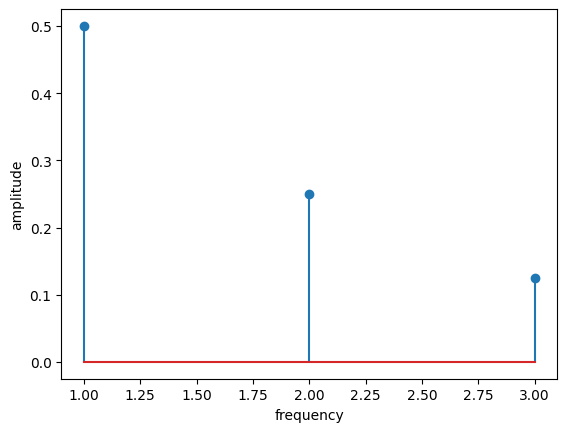

In [8]:
def analyze1(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(np.pi*2 * args)
    amps = np.linalg.solve(M, ys)
    return amps

framerate = 11025
ts = np.linspace(0, 1, framerate)
freqs = np.array([1, 2, 3])
amps = np.array([0.5, 0.25, 0.125])
y = synthesize2(amps, freqs, ts)

# now get the amps back out
amps2 = analyze1(y[0:len(freqs)], freqs, ts[0:len(freqs)])


plt.stem(freqs,amps)
#plt.stem(freqs,amps2)
plt.xlabel("frequency")
plt.ylabel("amplitude")

## Analysis (signal decomposition) with DCT-IV

For those who like this kind of thing:

$\Large X_k =
 \sum_{n=0}^{N-1} x_n \cos \left[\frac{\pi}{N} \left(n+\frac{1}{2}\right) \left(k+\frac{1}{2}\right) \right] \quad \quad k = 0, \dots, N-1.$
 
Adapted from https://en.wikipedia.org/wiki/Discrete_cosine_transform#DCT-IV

In [9]:
# ThinkDSP p70
def dct_iv(ys):
    N = len(ys)
    ts = (0.5 + np.arange(N)) / N
    fs = (0.5 + np.arange(N)) / 2
    args = np.outer(ts, fs)
    M = np.cos(np.pi* 2 * args)
    amps = np.dot(M, ys) / (N/2) # note changed from book
    return amps



N = 3
amps = np.linspace(0.1, 1.0,N)
ts = (0.5 + np.arange(N)) / N
fs = (0.5 + np.arange(N)) / 2

# create a signal
ys = synthesize2(amps, fs, ts)

# analyse with dct
amps2 = dct_iv(ys)

# analyse with analyse1
amps3 = analyze1(ys, fs, ts)

print("freqs", fs)
print("amps", amps)
print("amps from dct:", amps2)
print("amps from analyse:", amps3)



args (3, 3)
M of cos (3, 3)
final ys (3,)
freqs [0.25 0.75 1.25]
amps [0.1  0.55 1.  ]
amps from dct: [0.1  0.55 1.  ]
amps from analyse: [0.1  0.55 1.  ]
